In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the libraries as shown below

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:

BATCH_SIZE = 50
EPOCHS = 10
LEARNING_RATE = 0.001
IMAGE_SIZE = (224,224)
NUM_CLASSES = 2

train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/valid'

In [ ]:
# Set up data generators for training and validation data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,

)

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/valid',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 200 images belonging to 2 classes.


In [ ]:
input_shape = (224, 224, 3)

# Load the pre-trained MobileNetV2 model
mobilenetv2 = MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

# Create a sequential model and add MobileNetV2 to it
model = Sequential()
model.add(Input(shape=input_shape))
model.add(mobilenetv2)
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dense(2, activation='softmax'))

model.summary()

# Freeze the weights of all layers in the MobileNetV2 except for the last layer
for layer in mobilenetv2.layers[:-1]:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 16)                1003536   
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3,261,554
Trainable params: 3,227,442
Non-tra

In [ ]:
model.compile(optimizer=Adam(lr=LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(train_generator, validation_data=valid_generator, epochs=EPOCHS)

Epoch 1/10
4/4 [==============================] - 7s 869ms/step - loss: 1.9352 - accuracy: 0.6400 - val_loss: 2.2274 - val_accuracy: 0.8750
Epoch 2/10
4/4 [==============================] - 1s 377ms/step - loss: 0.9338 - accuracy: 0.9500 - val_loss: 0.5945 - val_accuracy: 0.9850
Epoch 3/10
4/4 [==============================] - 1s 372ms/step - loss: 0.1218 - accuracy: 0.9950 - val_loss: 0.2284 - val_accuracy: 0.9950
Epoch 4/10
4/4 [==============================] - 1s 379ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1287 - val_accuracy: 0.9950
Epoch 5/10
4/4 [==============================] - 1s 364ms/step - loss: 9.5060e-07 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9900
Epoch 6/10
4/4 [==============================] - 2s 601ms/step - loss: 0.0055 - accuracy: 0.9950 - val_loss: 0.0867 - val_accuracy: 0.9900
Epoch 7/10
4/4 [==============================] - 2s 607ms/step - loss: 4.7684e-09 - accuracy: 1.0000 - val_loss: 0.0791 - val_accuracy: 0.9900
Epoch 8/

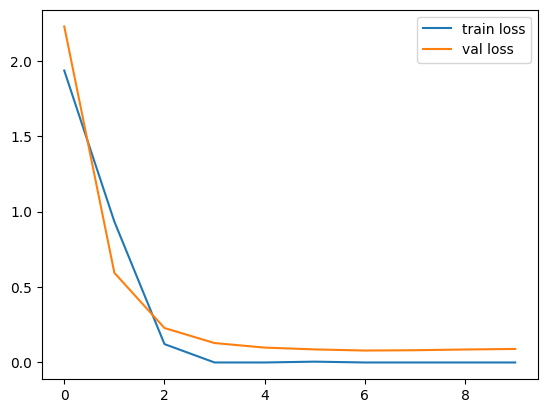

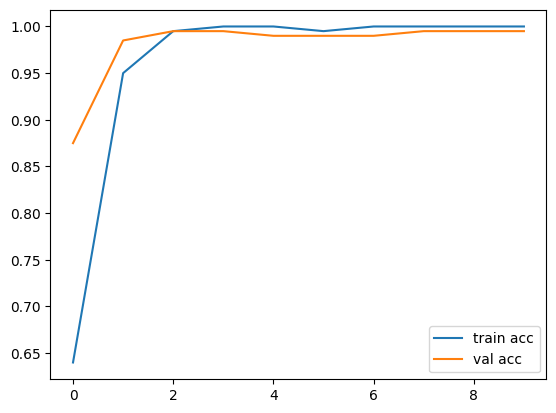

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

4/4 [==============================] - 1s 222ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0


4/4 [==============================] - 1s 153ms/step
[[ 99   1]
 [  0 100]]
              precision    recall  f1-score   support

       Crack       1.00      0.99      0.99       100
   Non Crack       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



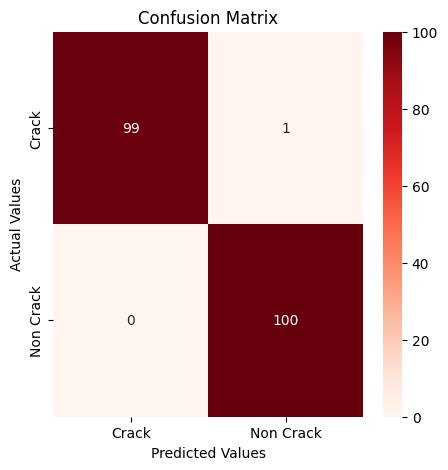

Accuracy: 99.50%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import pandas as pd

# Get predicted classes for the validation set
prediction = model.predict(valid_generator)
pred = np.argmax(prediction, axis=1)

# Get the actual classes for the validation set
y_true = valid_generator.classes

class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

# Generate confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)

# Print classification report
report = classification_report(y_true, pred, target_names=class_names)
print(report)

# Create pandas dataframe for confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True,cmap='Reds', fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_true, pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))